In [12]:
import math

import matplotlib.pyplot as plt

rad = lambda x: x*math.pi/180

# x = {float} 2.1482423649299967
# y = {float} 41.39141715798787
# 
# x = {float} 2.1456008364873647
# y = {float} 41.38433040229162

lon2 = 2.1482423649299967
lat2 = 41.39141715798787

lon1 = 2.1456008364873647
lat1 = 41.38433040229162

lat1:float = math.radians(lat1)
lon1:float = math.radians(lon1)
lat2:float = math.radians(lat2)
lon2:float = math.radians(lon2)

distance =math.acos(math.sin(lat1)*math.sin(lat2)+math.cos(lat1)*math.cos(lat2)*math.cos(lon2-lon1))*6371000
print(distance)
[0.00493344]

818.244133968274


[0.00493344]

In [9]:
import math
import pymongo
import numpy as np
from ngboost import NGBRegressor
from ngboost.distns import Normal
from ngboost.scores import LogScore
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

def get_data(days):
    
    client = pymongo.MongoClient("mongodb://localhost:27017/")

    if "EUA_db" in client.list_database_names():
        client.drop_database("EUA_db")
    db = client["EUA_db"]

    # Create two collections (tables)
    server_data = db["servers_data"]
    


def create_models(days):

    P= 1440
    servers = get_data(days)
    pred_onoff = []
    pred_level = []

    for server in range(len(servers)):

        # On/off prediction
        # Prepare data for periodic logistic regression
        # Create apply transformations to time taking account periods
        C = lambda t: math.cos(t * 2 * math.pi /P)
        S = lambda t: math.sin(t * 2 * math.pi /P)
        time = np.array([[C(t),S(t)] for t in range(days*P)])
        data_server = servers[server]

        # Server on/off model creation
        server_status = data_server['on_off']
        pred = LogisticRegression(solver='liblinear', random_state=0)
        pred.fit(time,server_status)
        pred_onoff.append(pred)

        # # Preparing data for server level prediction
        # # Server level prediction
        # for resource in range(len(test.input.servers[server].resources)):
        #     x_train, _, y_train, _ = train_test_split(
        #                                             data_server.drop(columns = resource),
        #                                             data_server[resource],
        #                                             train_size = 0.75,
        #                                             random_state = 1212324)
        #     ngb_model = NGBRegressor(Dist=Normal, Score=LogScore)
        #     ngb_model.set_params(n_estimators=2000, max_depth=3, learning_rate=0.01)
        #     ngb_model.fit(x_train, y_train)
        #     pred_level[server][resource] = ngb_model


get_data(90)

<Axes: >

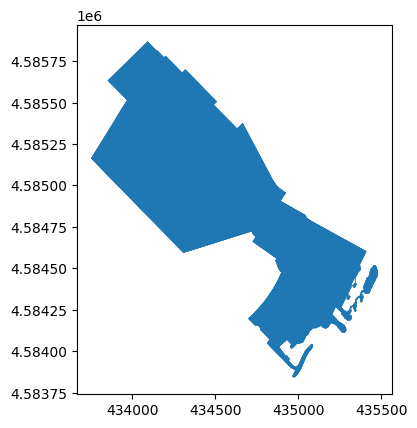

In [15]:
import geopandas as gpd
districts = gpd.read_file('../inputs/map_bcn.json')
districts[districts['BARRI']=='70'].plot()
# districts['BARRI']

23.166547060636173
1892.876139169879


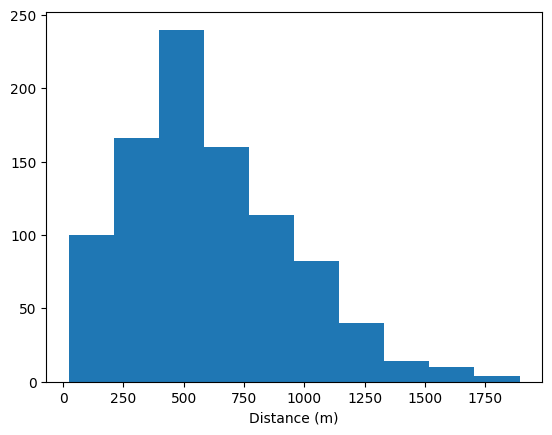

In [17]:
import math
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../servers.txt',sep="\t")
df['lat'] = df.apply(lambda x: math.radians(x['lat']),axis=1)
df['lon'] = df.apply(lambda x: math.radians(x['lon']),axis=1)
# display(df)

dist = lambda s: math.acos(math.sin(s[0]['lat'])*math.sin(s[1]['lat'])+math.cos(s[0]['lat'])*math.cos(s[1]['lat'])*math.cos(s[1]['lon']-s[0]['lon']))*6371000

l = [(row1,row2) for idx1,row1 in df.iterrows() for idx2,row2 in df.iterrows() if idx1!=idx2]
distances = list(map(dist,l))

plt.xlabel("Distance (m)")

print(min(distances))
print(max(distances))
plot = plt.hist(distances)
#plot = plt.hist(distances,density=True,cumulative=True)

In [26]:
df.shape

(31, 2)

In [29]:
31*31/2

480.5